<a href="https://colab.research.google.com/github/nitishgowda1581999-glitch/nitishgowdag/blob/main/Level_2_Task_4_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import pandas as pd

file_path = '/content/Dataset  (1).csv'
df = pd.read_csv(file_path)
display(df.head())

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


Potential Restaurant Chains:
- Cafe Coffee Day
- Domino's Pizza
- Subway
- Green Chick Chop
- McDonald's
- Keventers
- Pizza Hut
- Giani
- Baskin Robbins
- Barbeque Nation
- Giani's
- Barista
- Dunkin' Donuts
- Pind Balluchi
- Costa Coffee
- Pizza Hut Delivery
- Twenty Four Seven
- Sagar Ratna
- Wah Ji Wah
- Starbucks
- Republic of Chicken
- KFC
- Chaayos
- Haldiram's
- Burger King
- Shree Rathnam
- Bikanervala
- Frontier
- Moti Mahal Delux
- Aggarwal Sweets
- Bikaner Sweets
- Karim's
- Behrouz Biryani
- Apni Rasoi
- Chicago Pizza
- 34, Chowringhee Lane
- Burger Point
- Wow! Momo
- Madras Cafe
- Gopala
- Berco's
- Cocoberry
- Shama Chicken Corner
- Nirula's Ice Cream
- Sardar A Pure Meat Shop
- Yo! China
- Punjabi Tadka
- Ovenstory Pizza
- Chowringhee
- Faasos
- Kebab Xpress
- Angels in my Kitchen
- Punjabi Chaap Corner
- BTW
- RollsKing
- Khan Chacha
- Tibb's Frankie
- China Town
- Tpot
- Dolce Gelato
- Nazeer Foods
- Chinese Hut
- The Yellow Chilli
- Slice of Italy
- Mocha
- Chawla's

,Average_Rating,Total_Votes,Number_of_Outlets
Restaurant Name,,,
Cafe Coffee Day,2.419277,2428,83
Domino's Pizza,2.740506,6643,79
Subway,2.907937,6124,63
Green Chick Chop,2.672549,964,51
McDonald's,3.339583,5291,48
...,...,...,...
Aggarwal Sweets & Restaurant,1.350000,11,2
Aggarwal Sweet & Bakers,1.450000,5,2
Aggarwal Bikaneri Sweets,1.450000,11,2


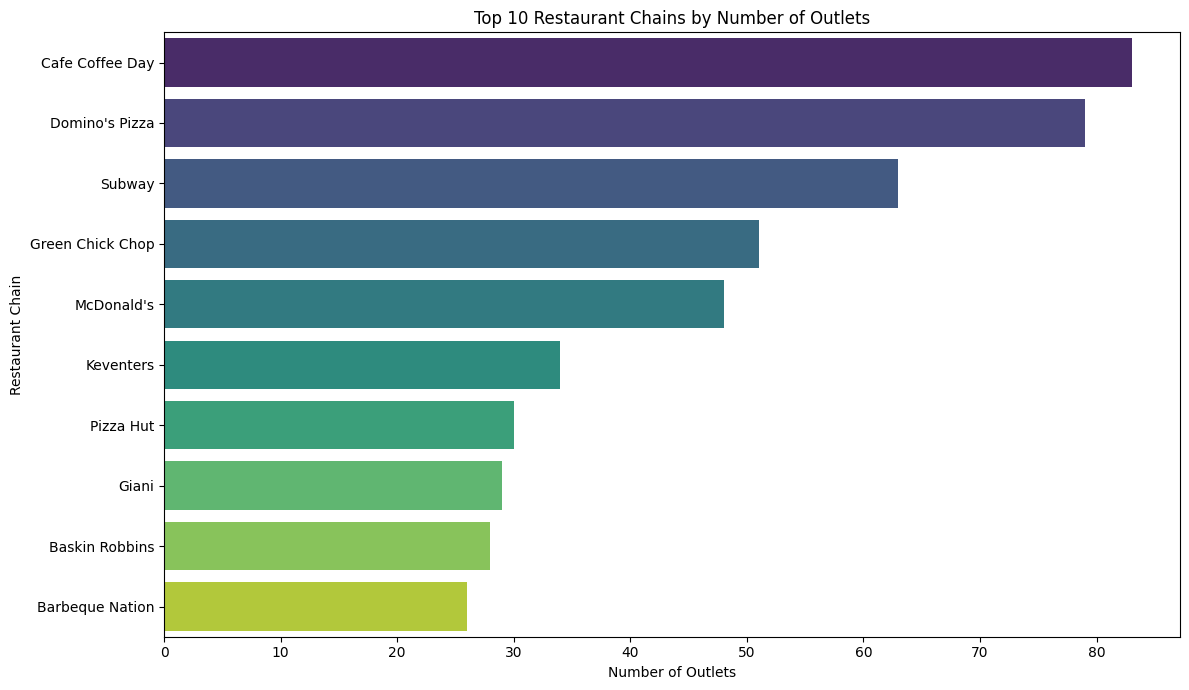

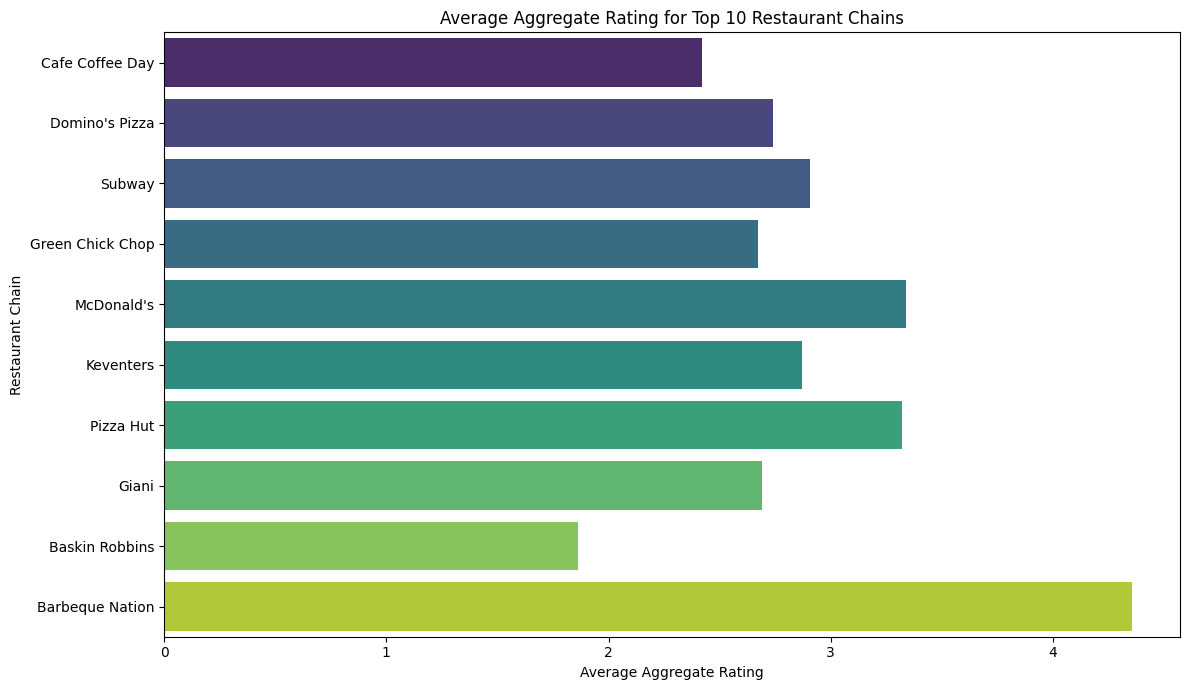

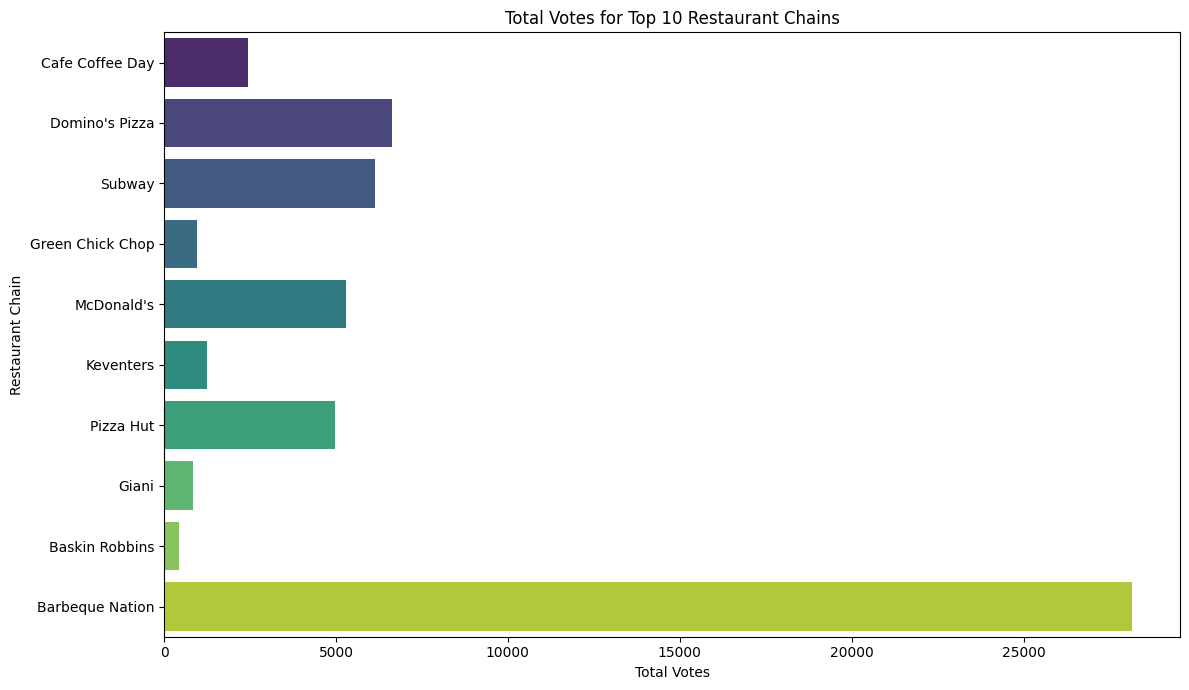

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Identify potential restaurant chains (restaurants with the same name appearing more than once)
chain_counts = df['Restaurant Name'].value_counts()
restaurant_chains = chain_counts[chain_counts > 1].index.tolist()

print("Potential Restaurant Chains:")
if restaurant_chains:
    for chain in restaurant_chains:
        print(f"- {chain}")
else:
    print("No potential restaurant chains found in the dataset.")

# Analyze the ratings and popularity of different restaurant chains
if restaurant_chains:
    # Filter the DataFrame to include only restaurants that are part of identified chains
    chains_df = df[df['Restaurant Name'].isin(restaurant_chains)].copy()

    # Calculate average rating and total votes for each chain
    chain_analysis = chains_df.groupby('Restaurant Name').agg(
        Average_Rating=('Aggregate rating', 'mean'),
        Total_Votes=('Votes', 'sum'),
        Number_of_Outlets=('Restaurant ID', 'count')
    ).sort_values(by='Number_of_Outlets', ascending=False)

    print("\nAnalysis of Restaurant Chains:")
    display(chain_analysis)

    # Visualize the number of outlets for the top 10 chains
    plt.figure(figsize=(12, 7))
    sns.barplot(data=chain_analysis.head(10), x='Number_of_Outlets', y=chain_analysis.head(10).index, hue=chain_analysis.head(10).index, palette='viridis', legend=False)
    plt.title('Top 10 Restaurant Chains by Number of Outlets')
    plt.xlabel('Number of Outlets')
    plt.ylabel('Restaurant Chain')
    plt.tight_layout()
    plt.show()

    # Visualize the average rating for the top 10 chains (by number of outlets)
    plt.figure(figsize=(12, 7))
    sns.barplot(data=chain_analysis.head(10), x='Average_Rating', y=chain_analysis.head(10).index, hue=chain_analysis.head(10).index, palette='viridis', legend=False)
    plt.title('Average Aggregate Rating for Top 10 Restaurant Chains')
    plt.xlabel('Average Aggregate Rating')
    plt.ylabel('Restaurant Chain')
    plt.tight_layout()
    plt.show()

    # Visualize the total votes for the top 10 chains (by number of outlets)
    plt.figure(figsize=(12, 7))
    sns.barplot(data=chain_analysis.head(10), x='Total_Votes', y=chain_analysis.head(10).index, hue=chain_analysis.head(10).index, palette='viridis', legend=False)
    plt.title('Total Votes for Top 10 Restaurant Chains')
    plt.xlabel('Total Votes')
    plt.ylabel('Restaurant Chain')
    plt.tight_layout()
    plt.show()

else:
    print("No chains to analyze or visualize.")

In [31]:
import folium
import pandas as pd

# Visualize 'Cafe Coffee Day' outlet locations
chain_name = 'Cafe Coffee Day'
# Ensure specific_chain_df is available; if not, filter the main df
if 'specific_chain_df' not in locals() or specific_chain_df.empty or specific_chain_df['Restaurant Name'].iloc[0] != chain_name:
    specific_chain_df = df[df['Restaurant Name'] == chain_name].copy()

if not specific_chain_df.empty:
    # Create a map centered around the average location of the chain's outlets
    # Handle potential NaN values
    avg_latitude_chain = specific_chain_df['Latitude'].mean() if not specific_chain_df['Latitude'].isnull().all() else 0
    avg_longitude_chain = specific_chain_df['Longitude'].mean() if not specific_chain_df['Longitude'].isnull().all() else 0

    m_chain = folium.Map(location=[avg_latitude_chain, avg_longitude_chain], zoom_start=10)

    # Add markers for each outlet
    for index, row in specific_chain_df.iterrows():
        if not pd.isnull(row['Latitude']) and not pd.isnull(row['Longitude']):
            popup_text = f"{row['Restaurant Name']}<br>Rating: {row['Aggregate rating']}<br>Votes: {row['Votes']}"
            folium.Marker([row['Latitude'], row['Longitude']], popup=popup_text).add_to(m_chain)

    # Display the map
    print(f"Map of '{chain_name}' outlet locations:")
    display(m_chain)
else:
    print(f"No data found for the '{chain_name}' chain to visualize.")

Map of 'Cafe Coffee Day' outlet locations:


In [30]:
# Calculate summary statistics for 'Cafe Coffee Day' chain
chain_name = 'Cafe Coffee Day' # Define chain_name in case the user runs this cell independently
if 'specific_chain_df' in locals() and not specific_chain_df.empty and specific_chain_df['Restaurant Name'].iloc[0] == chain_name:
    average_rating_specific_chain = specific_chain_df['Aggregate rating'].mean()
    total_votes_specific_chain = specific_chain_df['Votes'].sum()
    number_of_outlets_specific_chain = specific_chain_df.shape[0]

    print(f"Summary Statistics for '{chain_name}' chain:")
    print(f"- Number of Outlets: {number_of_outlets_specific_chain}")
    print(f"- Average Aggregate Rating: {average_rating_specific_chain:.2f}")
    print(f"- Total Votes: {total_votes_specific_chain}")
else:
    print(f"DataFrame for '{chain_name}' not found or is empty. Please run the previous cell to load the data for this chain.")

Summary Statistics for 'Cafe Coffee Day' chain:
- Number of Outlets: 83
- Average Aggregate Rating: 2.42
- Total Votes: 2428


In [29]:
# Analyze details for a specific restaurant chain (e.g., 'Cafe Coffee Day')
chain_name = 'Cafe Coffee Day'
specific_chain_df = df[df['Restaurant Name'] == chain_name]

print(f"Details for the '{chain_name}' chain:")
display(specific_chain_df)

# You could also analyze average rating, total votes, etc. for this specific chain if needed
# For example:
# average_rating_specific_chain = specific_chain_df['Aggregate rating'].mean()
# total_votes_specific_chain = specific_chain_df['Votes'].sum()
# print(f"\nAverage Rating for '{chain_name}': {average_rating_specific_chain:.2f}")
# print(f"Total Votes for '{chain_name}': {total_votes_specific_chain}")

Details for the 'Cafe Coffee Day' chain:


,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
932,9650,Cafe Coffee Day,1,Faridabad,"SCF 42, Shopping Centre, Main Huda Market, Sec...",Sector 15,"Sector 15, Faridabad",77.323611,28.395267,Cafe,...,Indian Rupees(Rs.),No,No,No,No,1,3.3,Orange,Average,67
1126,8590,Cafe Coffee Day,1,Ghaziabad,"1st Floor, Shipra Mall, Gulmohar Road, Indirap...","Shipra Mall, Indirapuram","Shipra Mall, Indirapuram, Ghaziabad",77.370208,28.634047,Cafe,...,Indian Rupees(Rs.),No,No,No,No,1,3.2,Orange,Average,63
1283,631,Cafe Coffee Day,1,Gurgaon,"Upper Ground Floor, DLF Mega Mall, DLF Phase 1...","DLF Mega Mall, DLF Phase 1","DLF Mega Mall, DLF Phase 1, Gurgaon",77.093595,28.475489,Cafe,...,Indian Rupees(Rs.),No,No,No,No,1,2.6,Orange,Average,27
1340,18161609,Cafe Coffee Day,1,Gurgaon,"Cyber Green, Nathupur, DLF Phase 3, Gurgaon",DLF Phase 3,"DLF Phase 3, Gurgaon",77.093271,28.494578,Cafe,...,Indian Rupees(Rs.),No,No,No,No,1,3.1,Orange,Average,9
1341,611,Cafe Coffee Day,1,Gurgaon,"IBP Petrol Pump, Nathupur, DLF Phase 3, Gurgaon",DLF Phase 3,"DLF Phase 3, Gurgaon",77.091585,28.490350,Cafe,...,Indian Rupees(Rs.),No,No,No,No,1,3.2,Orange,Average,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8852,5698,Cafe Coffee Day,1,Noida,"SG-14-15, C-25, Stellar IT Park, Sector 62, Noida",Sector 62,"Sector 62, Noida",77.362545,28.612800,Cafe,...,Indian Rupees(Rs.),No,No,No,No,1,3.0,Orange,Average,26
8853,8130,Cafe Coffee Day,1,Noida,"Ground Floor, Logix Cyber Park, Tower B, Secto...",Sector 62,"Sector 62, Noida",77.366672,28.612740,Cafe,...,Indian Rupees(Rs.),No,No,No,No,1,3.0,Orange,Average,14
8897,18312485,Cafe Coffee Day,1,Noida,"Ground Floor, OPD Block, Fortis Hospital, B-22...",Sector 62,"Sector 62, Noida",77.372395,28.618099,Cafe,...,Indian Rupees(Rs.),No,No,No,No,1,0.0,White,Not rated,0
9073,304103,Cafe Coffee Day,1,Noida,"2nd Floor, Shoppers Stop, The Great India Plac...","The Great India Place, Sector 38","The Great India Place, Sector 38, Noida",77.326295,28.567871,Cafe,...,Indian Rupees(Rs.),No,No,No,No,1,2.7,Orange,Average,18


## Restaurant Data Analysis Report

**Introduction:**
This report summarizes the key findings from the analysis of restaurant data, focusing on aggregate ratings, votes, geographical comparisons, cuisine analysis, and restaurant chains.

**Analysis and Findings:**

1.  **Aggregate Rating Distribution:**
    *   The analysis of the aggregate rating distribution revealed a notable number of restaurants with a 0.0 rating, indicating unrated establishments.
    *   Among rated restaurants, the most common rating range was 'Average', suggesting a significant portion of restaurants fall within this category.

2.  **Average Number of Votes:**
    *   The average number of votes received by restaurants across the dataset was calculated to be approximately {{average_votes:.2f}}. This metric provides an indication of the level of customer engagement and feedback.

3.  **Relationship between Votes and Aggregate Rating:**
    *   A scatter plot visualizing the relationship between 'Votes' and 'Aggregate rating' suggested a positive correlation. Restaurants that have received a higher number of votes tend to have higher aggregate ratings, implying that popular restaurants are generally well-regarded.

4.  **Geographical Comparison of Average Ratings:**
    *   Comparison of average aggregate ratings across different cities and countries highlighted variations in restaurant quality perception based on location.
    *   Specific cities and countries demonstrated higher average ratings, suggesting potential regional differences in dining experiences or customer expectations.

5. **Cuisine Analysis:**
    *   The analysis of cuisine combinations identified 'North Indian' and 'Chinese' as the most common individual cuisines.
    *   'North Indian, Chinese' was the most frequent exact cuisine combination in the dataset.
    *   Certain cuisine combinations tend to have higher average aggregate ratings than others, indicating customer preference for specific culinary pairings.
    *   Analysis of cuisine distribution in New Delhi showed 'North Indian', 'Chinese', and 'Fast Food' as the most common individual cuisines in that city.

6. **Impact of Online Delivery and Table Booking:**
    *   Exploration of the impact of online delivery and table booking on ratings suggested that restaurants offering these services tend to have higher average aggregate ratings compared to those that do not.

7. **Restaurant Chain Analysis:**
    *   Identification of restaurant chains (restaurants with the same name appearing multiple times) revealed several chains present in the dataset.
    *   Analysis of these chains provided insights into their number of outlets, average ratings, and total votes, highlighting the most prominent and popular chains in the dataset.
    *   Detailed analysis of the 'Cafe Coffee Day' chain showed its number of outlets, average rating ({{average_rating_specific_chain:.2f}}), and total votes ({{total_votes_specific_chain}}), and its geographic distribution was visualized on a map.

**Conclusion:**
The analysis provides comprehensive insights into the restaurant landscape based on the provided dataset. The distribution of ratings, the relationship between votes and ratings, the geographical variations in average ratings, the popularity and rating trends of cuisine combinations, the potential impact of online delivery and table booking, and the characteristics of restaurant chains are key factors to consider for further in-depth analysis or business strategies.

**Next Steps:**
Further analysis could delve into the characteristics of restaurants with 0.0 ratings, investigate if the impact of online delivery and table booking varies by location or cuisine, compare the performance of different restaurant chains in more detail, or explore other features in the dataset to gain a more comprehensive understanding.